# Abstract
The Heart Disease UCI dataset, originating from the UCI Machine Learning Repository, comprises data from patients with 76 attributes related to the diagnosis of heart diseases, although only 14 are used for analysis. It includes characteristics such as age, sex, blood pressure, and cholesterol levels, aiming to predict the presence or absence of heart diseases.

# Summary of variables with definitions for laypeople  

Based on the documentation available at [UCI Machine Learning Repository](https://archive.ics.uci.edu/dataset/45/heart+disease)  

**sex**: 
- Value 1: Male.
- Value 0: Female.  

**cp (Chest pain)**:
- Value 1: Typical angina: Common chest pain associated with the heart, usually caused by lack of blood flow.
- Value 2: Atypical angina: Chest pain, but not following the common pattern of heart pain.
- Value 3: Non-cardiac pain: Chest pain not related to the heart, may have other causes.
- Value 4: Asymptomatic: The person does not feel chest pain.

**trestbps (Resting blood pressure)**: Measure of blood pressure when the person is at rest, usually upon hospital admission. The unit of measurement is millimeters of mercury (mm Hg).

**chol (Serum cholesterol)**: The amount of cholesterol in the blood, measured in milligrams per deciliter (mg/dl). Cholesterol can be an indicator of heart problems.

**fbs (Fasting blood sugar)**: Indicates if the person has a blood sugar level above 120 mg/dl after fasting. If the value is 1, it means the level is high; if it is 0, the level is normal.

**restecg (Resting electrocardiogram result)**:
- Value 0: Normal: The electrocardiogram is normal, with no signs of heart problems.
- Value 1: ST-T wave abnormality: Shows changes in the electrocardiogram waves that may indicate heart problems.
- Value 2: Left ventricular hypertrophy: Shows that the heart wall is thickened, which may indicate overload or heart disease.

**thalach (Maximum heart rate achieved)**: The highest heart rate the person reached during a test or effort.

**exang (Exercise-induced angina)**: Shows if the person felt chest pain when exercising. Value 1 means yes, and 0 means no.

**oldpeak (ST segment depression induced by exercise)**: Difference in certain waves in the electrocardiogram when the person is at rest compared to when exercising. This may indicate blood flow problems in the heart.

**slope (Slope of the ST segment during exercise)**:
- Value 1: Upsloping: A pattern generally considered more normal.
- Value 2: Flat: May indicate some problem, but not the worst scenario.
- Value 3: Downsloping: Indicates a more serious heart problem.

**ca (Number of major vessels visualized by fluoroscopy)**: Refers to the number of major blood vessels visualized by an imaging exam, where the numbers range from 0 to 3.

**thal**:
- Value 3: Normal: Blood flow is normal.
- Value 6: Fixed defect: Part of the heart has a permanent blood flow problem.
- Value 7: Reversible defect: There is a temporary blood flow problem that can be corrected.

**num (Heart disease diagnosis)**:
- Value 0: No heart disease
- Value 1: Present, but less severe
- Value 2: More significant
- Value 3: Very advanced
- Value 4: Severe or high level

*Note: Originally, UCI offers the diagnosis description as 0 or 1, but as the data differs, researching on the internet, I found that for 1-4 it refers to the stages of the disease.

# Questions to the dataset
<u>Question 1:</u> How does the chest pain reported by the patient (cp) relate to the pain after exercise (exang)?

<u>Question 2:</u> What is the profile of those who have heart problems? (sex X age)

<u>Question 3:</u> To what extent do the patient's innate conditions, cholesterol (chol) and blood sugar (fbs), impact heart aggravation?

<u>Question 4:</u> How do the usual heart exams, blood pressure (trestbps) and heart rate (thalach), impact the diagnosis?

<u>Question 5:</u> How do the electrocardiogram exams (oldpeak, restecg, slope) impact the diagnosis?

# EDA

## Preparation

### Libraries and Data Reading

In [1]:
from ucimlrepo import fetch_ucirepo 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [2]:
warnings.filterwarnings("ignore")
sns.set(style='whitegrid')

# fetch dataset 
heart_disease = fetch_ucirepo(id=45) 
X = heart_disease.data.features
y = heart_disease.data.targets
df = pd.concat([X,y], axis=1)

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


### First Approach

In [4]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,299.000000,301.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.672241,4.734219,0.937294
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.937438,1.939706,1.228536
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        299 non-null    float64
 12  thal      301 non-null    float64
 13  num       303 non-null    int64  
dtypes: float64(3), int64(11)
memory usage: 33.3 KB


Analysis of distribution

array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'sex'}>,
        <Axes: title={'center': 'cp'}>,
        <Axes: title={'center': 'trestbps'}>],
       [<Axes: title={'center': 'chol'}>,
        <Axes: title={'center': 'fbs'}>,
        <Axes: title={'center': 'restecg'}>,
        <Axes: title={'center': 'thalach'}>],
       [<Axes: title={'center': 'exang'}>,
        <Axes: title={'center': 'oldpeak'}>,
        <Axes: title={'center': 'slope'}>,
        <Axes: title={'center': 'ca'}>],
       [<Axes: title={'center': 'thal'}>,
        <Axes: title={'center': 'num'}>, <Axes: >, <Axes: >]],
      dtype=object)

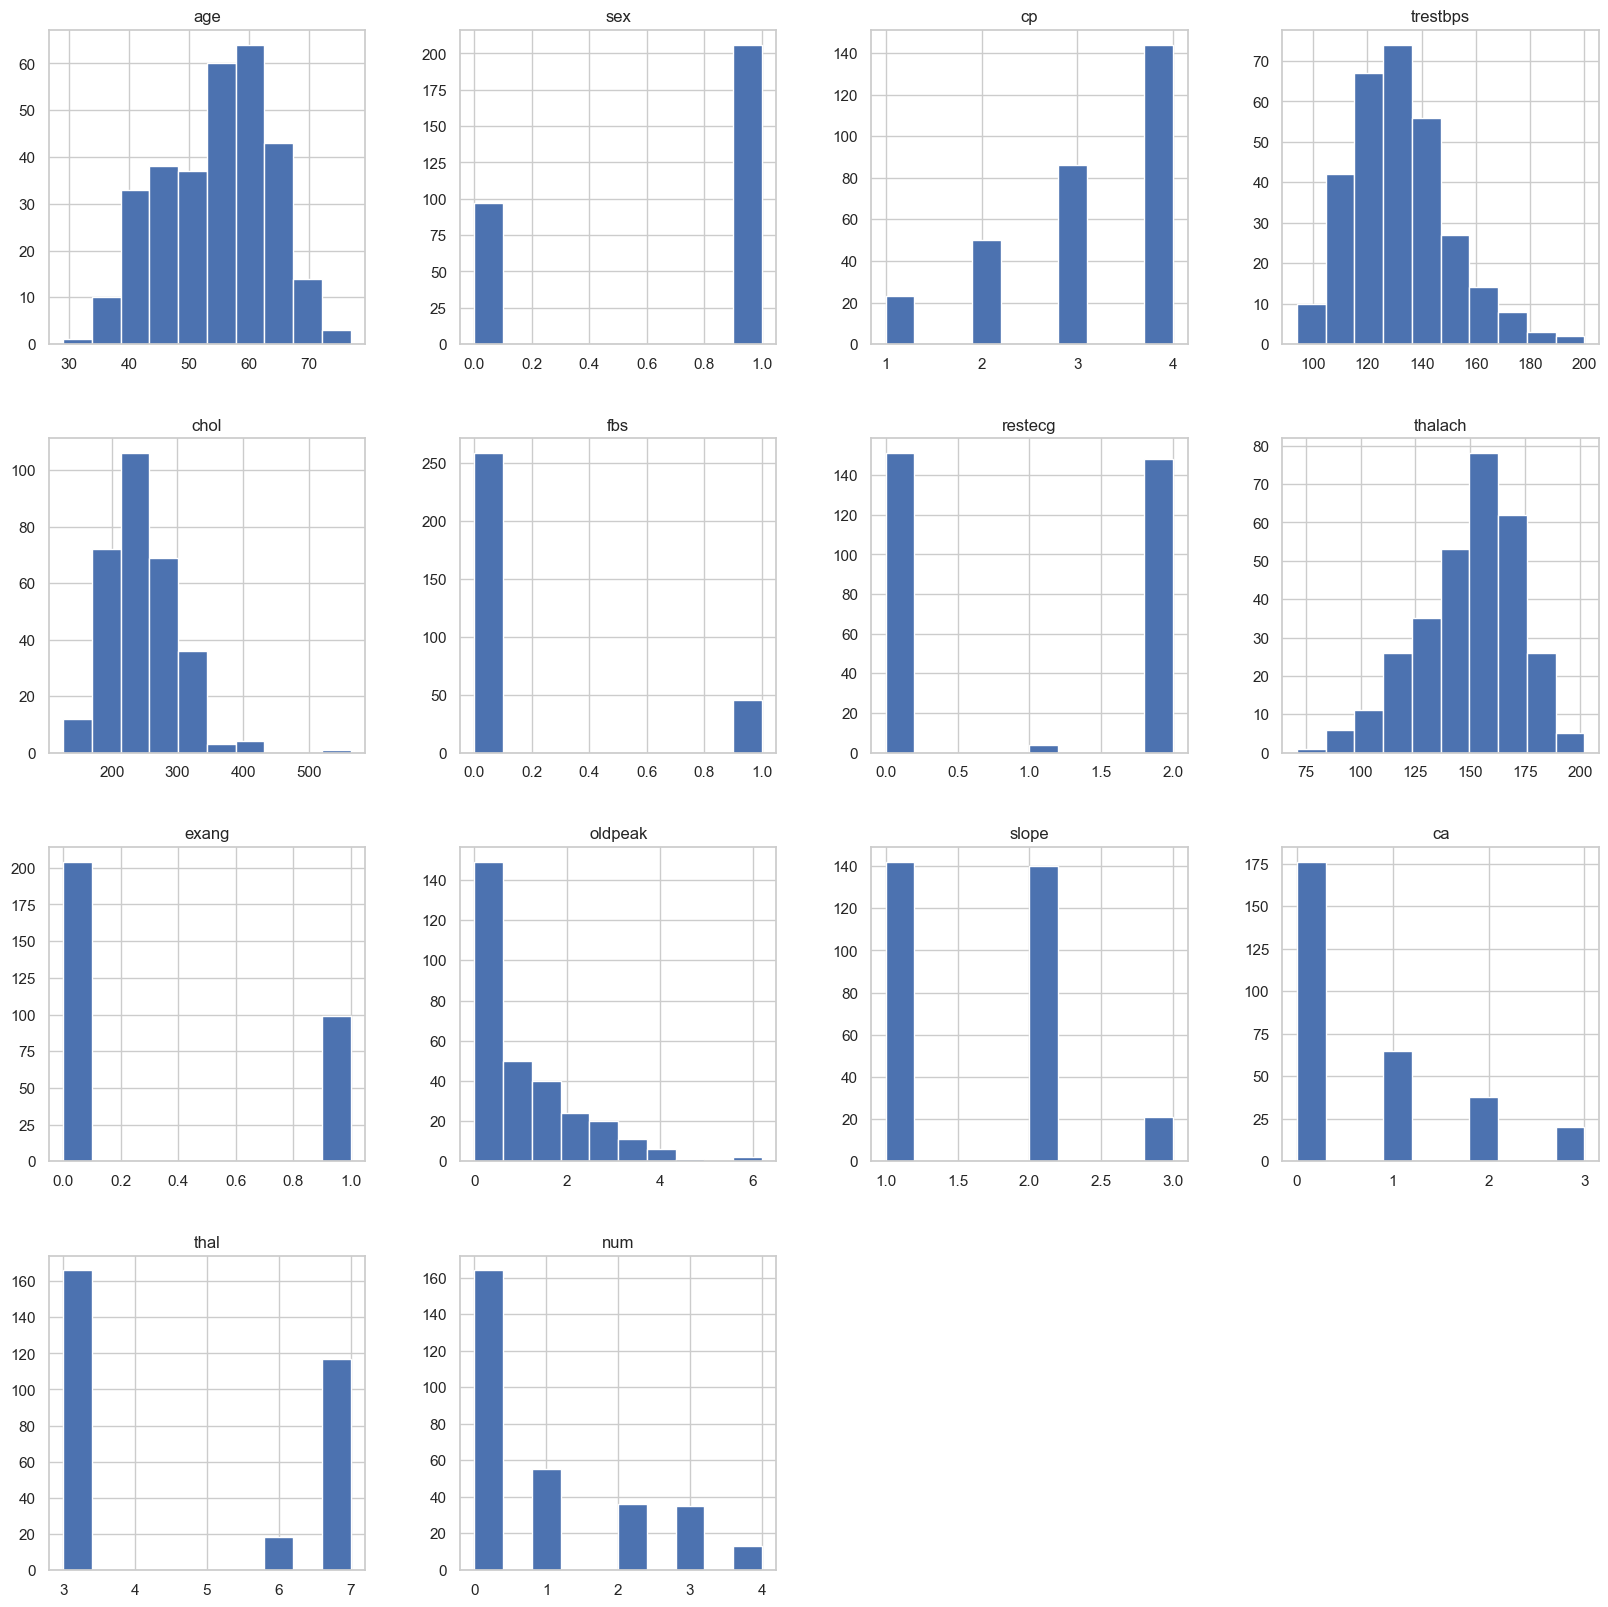

In [6]:
df.hist(figsize=(20,20))

The distribution of people in the severe stage of the disease (num=4) is low, which may hinder the overall analysis.

### Cleaning the data

Rows with missing data

In [7]:
df[df.isnull().any(axis=1)]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
87,53,0,3,128,216,0,2,115,0,0.0,1,0.0,NaN,0
166,52,1,3,138,223,0,0,169,0,0.0,1,NaN,3.0,0
192,43,1,4,132,247,1,2,143,1,0.1,2,NaN,7.0,1
266,52,1,4,128,204,1,0,156,1,1.0,2,0.0,NaN,2
287,58,1,2,125,220,0,0,144,0,0.4,2,NaN,7.0,0
302,38,1,3,138,175,0,0,173,0,0.0,1,NaN,3.0,0


Let's delete these few data points to have a more concise analysis

In [8]:
df = df.dropna()

The following variables are described as categorical, so let's transform them from type int to object

In [9]:
variaveis_categoricas = ['cp', 'restecg', 'slope', 'thal', 'num']
variaveis_booleanas = ['fbs', 'exang']
print('Valores únicos das variáveis categóricas:')
for col in variaveis_categoricas+variaveis_booleanas:
    print(f'{col}\t {df[col].unique()}')

Valores únicos das variáveis categóricas:
cp	 [1 4 3 2]
restecg	 [2 0 1]
slope	 [3 2 1]
thal	 [6. 3. 7.]
num	 [0 2 1 3 4]
fbs	 [1 0]
exang	 [0 1]


In [10]:
df['sex'] = df['sex'].map({0: 'Female', 1: 'Male'})
df[variaveis_booleanas] = df[variaveis_booleanas].astype('bool')
df[variaveis_categoricas] = df[variaveis_categoricas].astype('object')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 297 entries, 0 to 301
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       297 non-null    int64  
 1   sex       297 non-null    object 
 2   cp        297 non-null    object 
 3   trestbps  297 non-null    int64  
 4   chol      297 non-null    int64  
 5   fbs       297 non-null    bool   
 6   restecg   297 non-null    object 
 7   thalach   297 non-null    int64  
 8   exang     297 non-null    bool   
 9   oldpeak   297 non-null    float64
 10  slope     297 non-null    object 
 11  ca        297 non-null    float64
 12  thal      297 non-null    object 
 13  num       297 non-null    object 
dtypes: bool(2), float64(2), int64(4), object(6)
memory usage: 30.7+ KB


### Possible Outliers

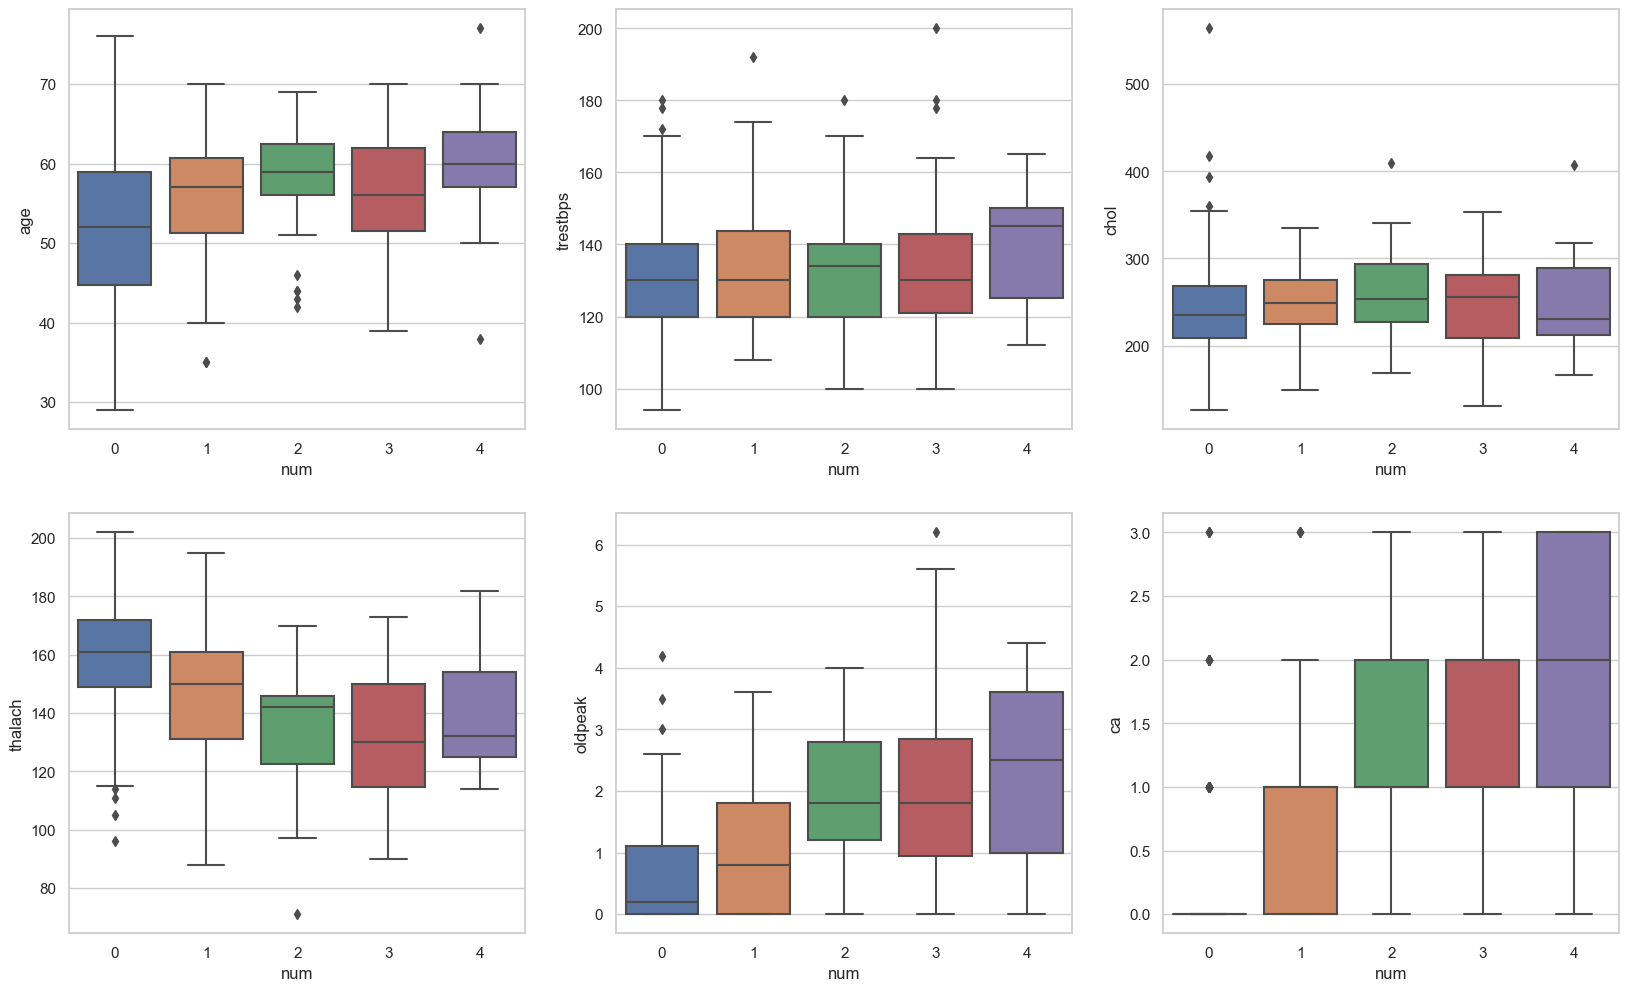

In [12]:
variaveis_numericas = ['age','trestbps','chol','thalach','oldpeak','ca']
fig, eixo = plt.subplots(2,3,figsize=(20,12))
for i in range(2*3):
    sns.boxplot(data=df,x='num',y=variaveis_numericas[i],ax=eixo[i//3][i%3])

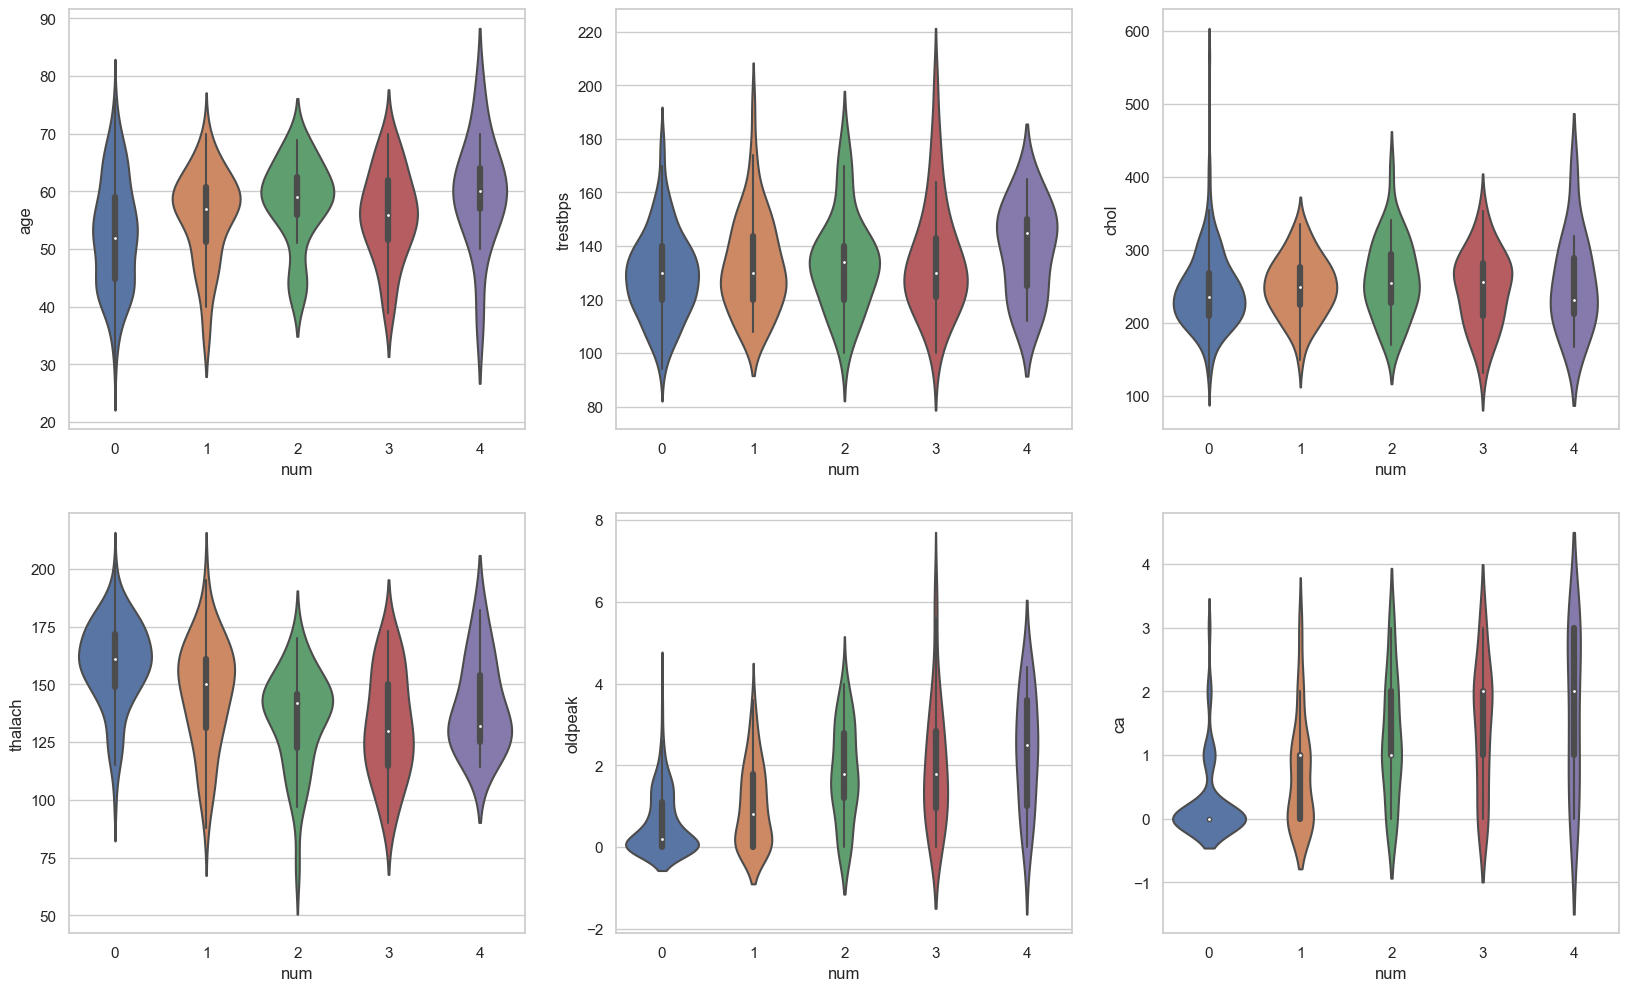

In [13]:
variaveis_numericas = ['age','trestbps','chol','thalach','oldpeak','ca']
fig, eixo = plt.subplots(2,3,figsize=(20,12))
for i in range(2*3):
    sns.violinplot(data=df,x='num',y=variaveis_numericas[i],ax=eixo[i//3][i%3])

It is possible to see that the outliers in the dataset refer to patients without heart disease. As the variables are indicators of the disease, when a patient without the disease presents the same diagnoses as those who have it, it is natural for them to exhibit this outlier behavior.

## Non-Directed Analysis

A variable that we can note as the most prominent for interpreting the data is 'num', that is, the one responsible for the diagnosis information.

Since the other variables were collected to provide this information, it proves crucial to relate the effectiveness of the others.

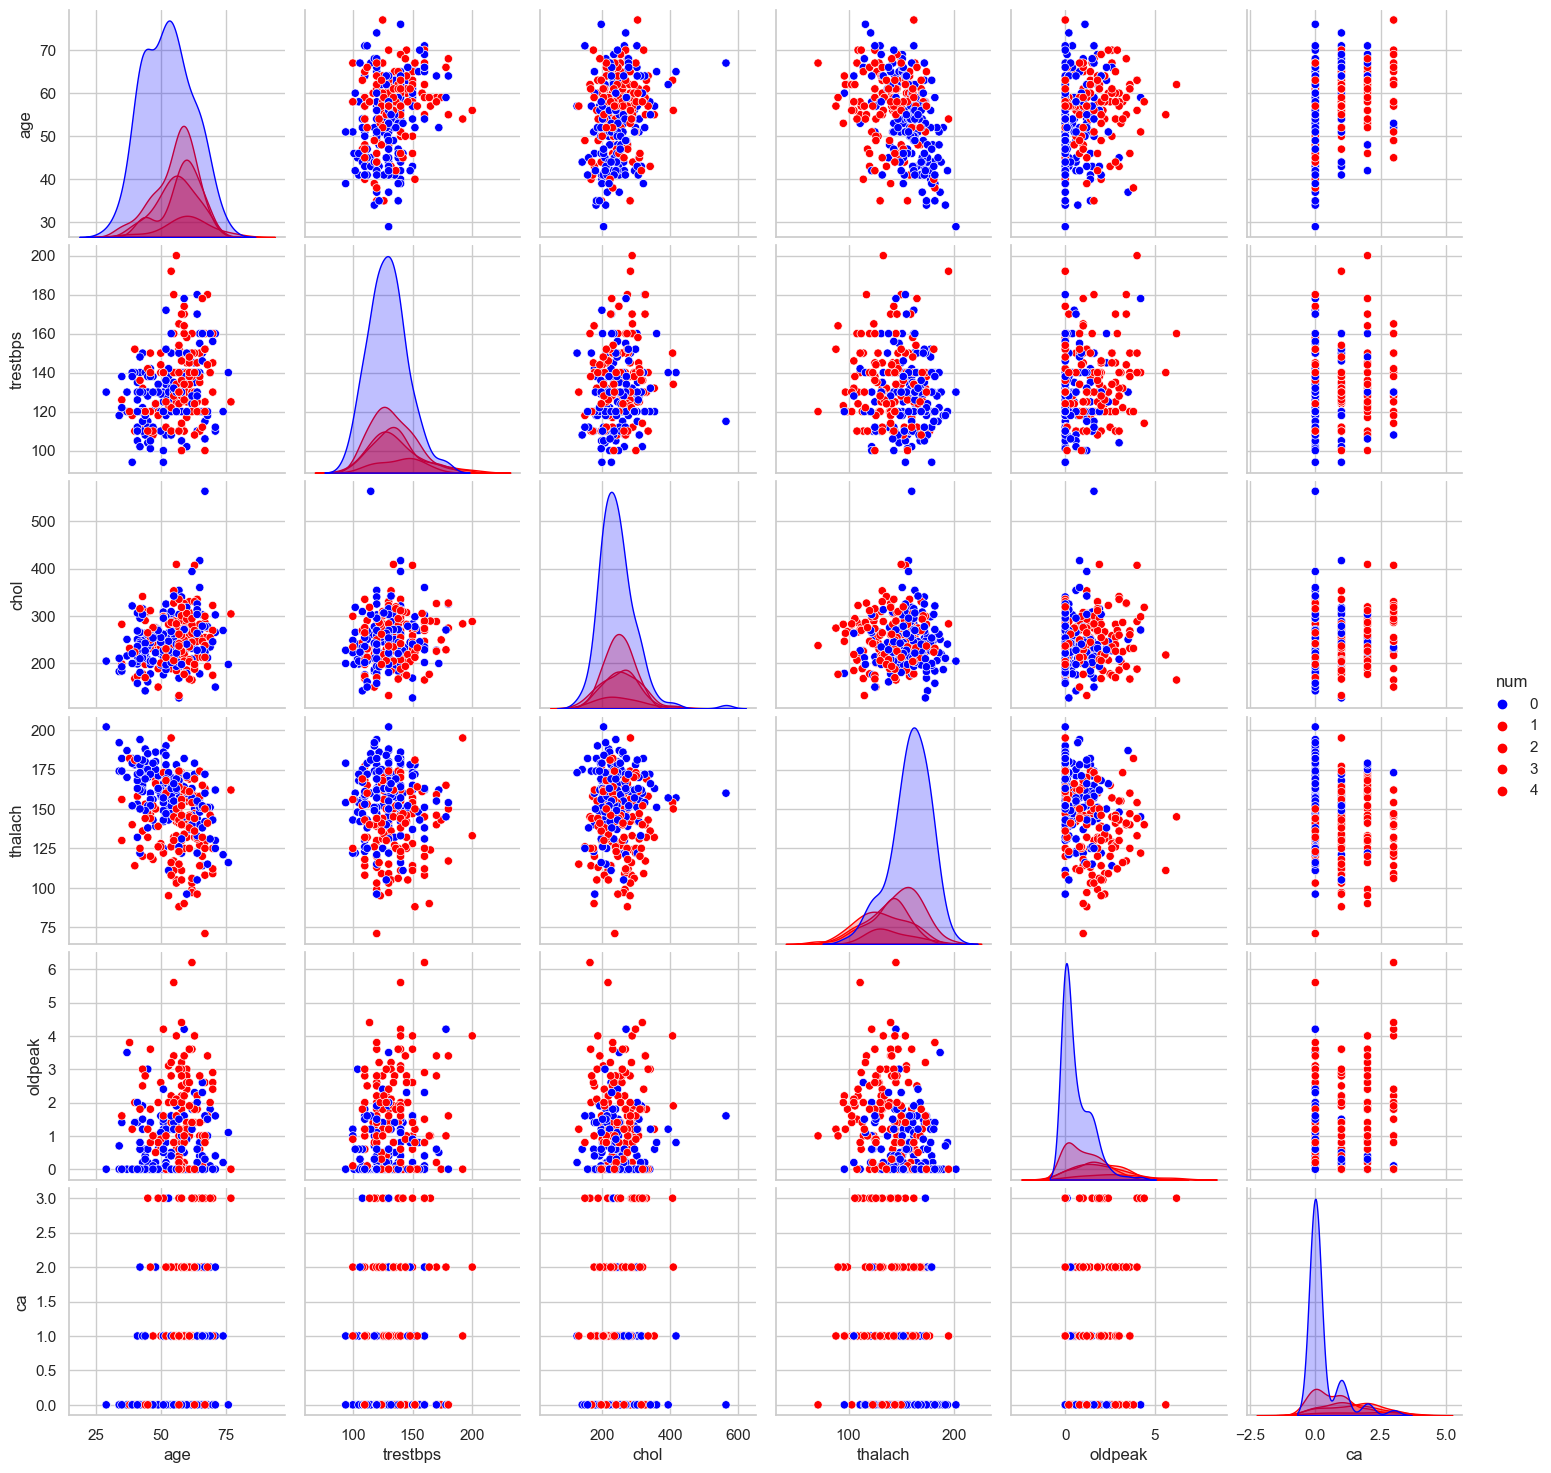

In [14]:
disease = 'red'
no_disease = 'blue'
palette = {0: no_disease, 1: disease, 2: disease, 3: disease, 4: disease}
variaveis_numericas = ['age','trestbps','chol','thalach','oldpeak','ca']
sns.pairplot(df, hue='num', vars=variaveis_numericas, palette=palette)

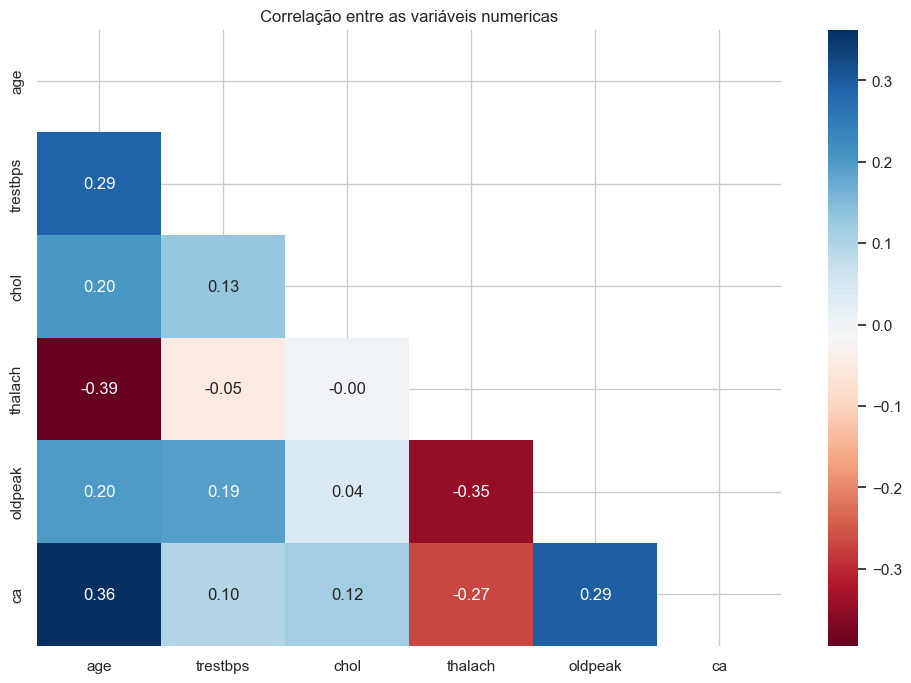

In [15]:
corr = df[variaveis_numericas].corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='RdBu', mask=np.triu(np.ones_like(corr)))
plt.title("Correlação entre as variáveis numericas")
plt.show()

Age and Maximum Heart Rate (thalach) have a good correlation, which is expected for elderly people.

## Directed Analysis

### Question 1

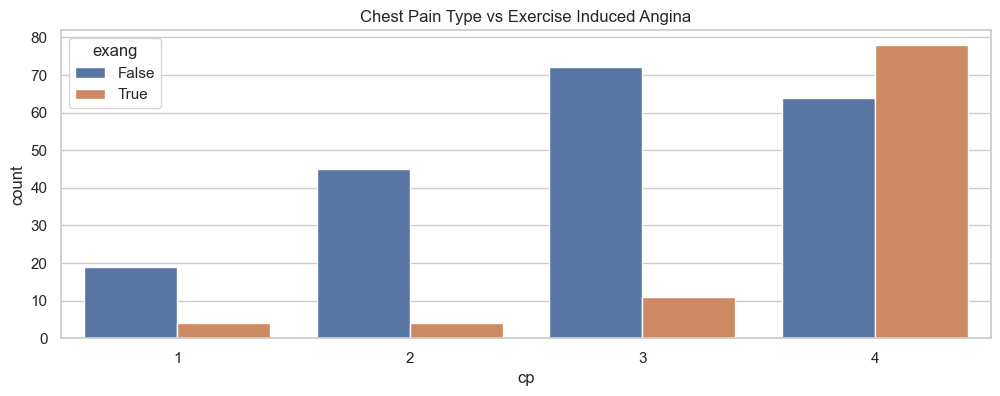

In [16]:
plt.figure(figsize=(12,4))
sns.countplot(x='cp', data=df, hue='exang')
plt.title('Chest Pain Type vs Exercise Induced Angina')
plt.show()

Curiously, people who reported not feeling chest pain (cp=4) demonstrated this pain when they exercised. Possibly, doctors perform this exercise precisely to confirm the reports or to make the patient discover they have this pain.

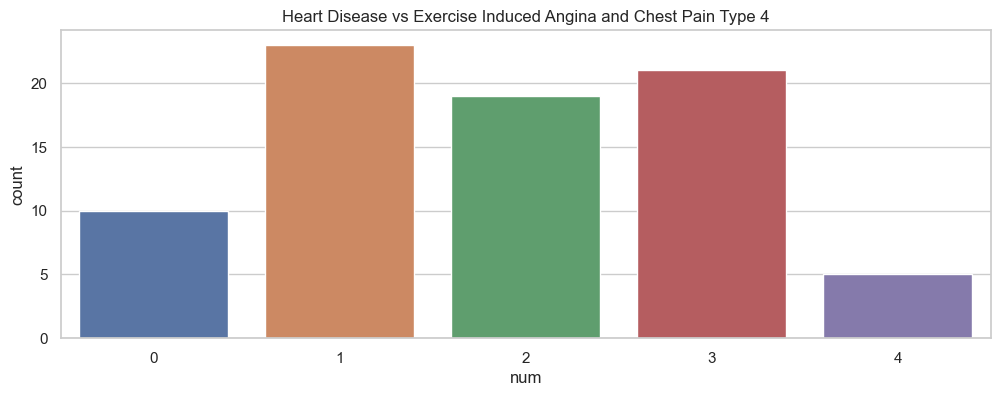

In [17]:
plt.figure(figsize=(12,4))
sns.countplot(x='num', data=df[(df['exang'] == True) & (df['cp'] == 4)])
plt.title('Heart Disease vs Exercise Induced Angina and Chest Pain Type 4')
plt.show()

Among those who did not know they had chest pain, the majority are in intermediate stages of the disease.

### Question 2

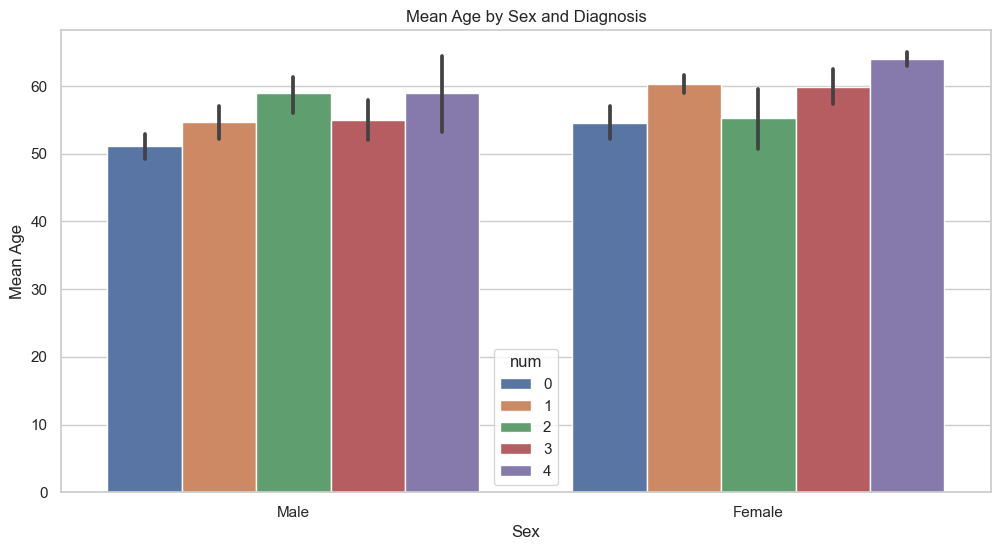

In [18]:
plt.figure(figsize=(12, 6))
sns.barplot(x='sex', y='age', hue='num', data=df, estimator=np.mean)
plt.title('Mean Age by Sex and Diagnosis')
plt.xlabel('Sex')
plt.ylabel('Mean Age')
plt.show()

No peculiar behavior.

### Question 3

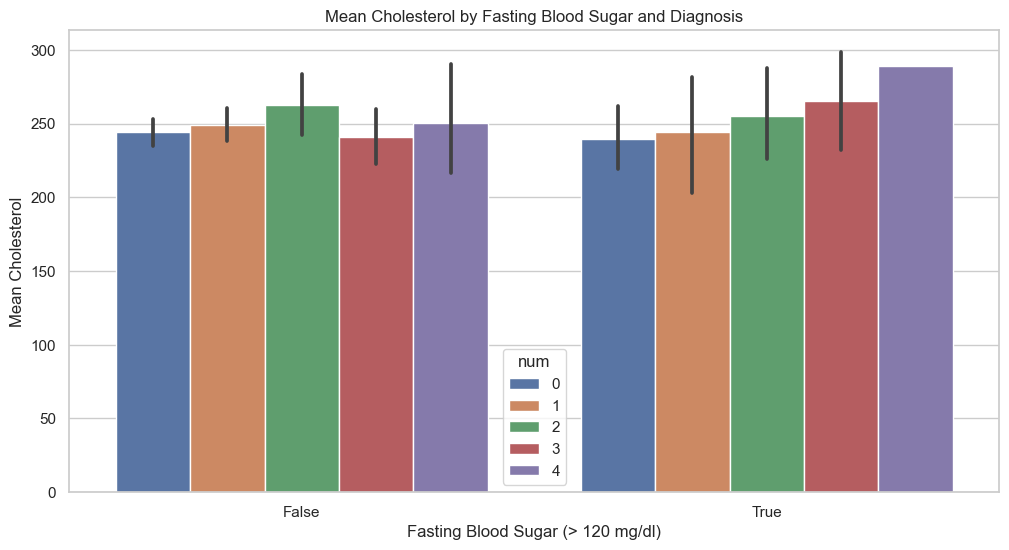

In [19]:
plt.figure(figsize=(12, 6))
sns.barplot(x='fbs', y='chol', hue='num', data=df, estimator=np.mean)
plt.title('Mean Cholesterol by Fasting Blood Sugar and Diagnosis')
plt.xlabel('Fasting Blood Sugar (> 120 mg/dl)')
plt.ylabel('Mean Cholesterol')
plt.show()

There doesn't seem to be anything very relevant in the distribution of these variables with the diagnosis, except that in the more advanced stages, there are a few more people with high fbs and cholesterol.

### Question 4

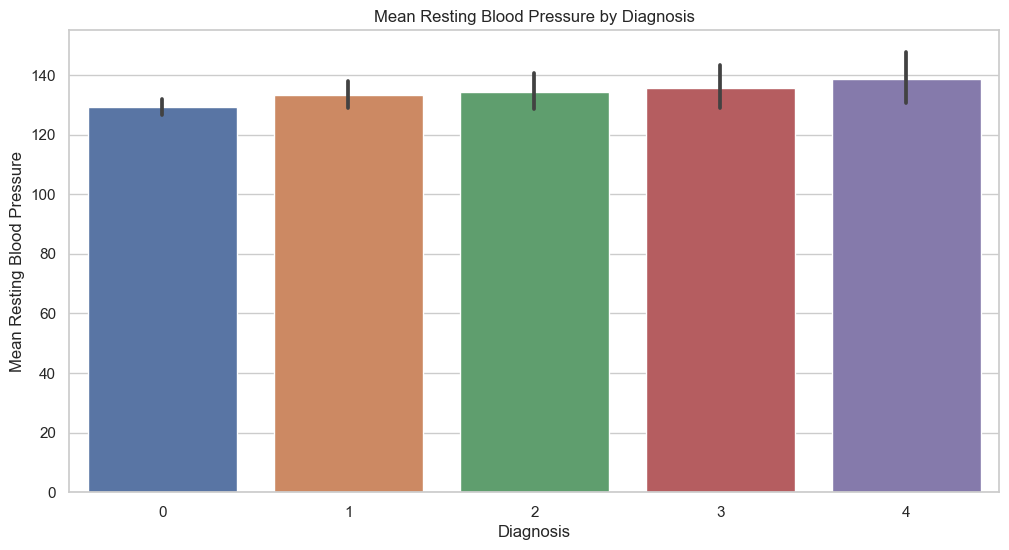

In [20]:
plt.figure(figsize=(12, 6))
sns.barplot(x='num', y='trestbps', data=df, estimator=np.mean)
plt.title('Mean Resting Blood Pressure by Diagnosis')
plt.xlabel('Diagnosis')
plt.ylabel('Mean Resting Blood Pressure')
plt.show()

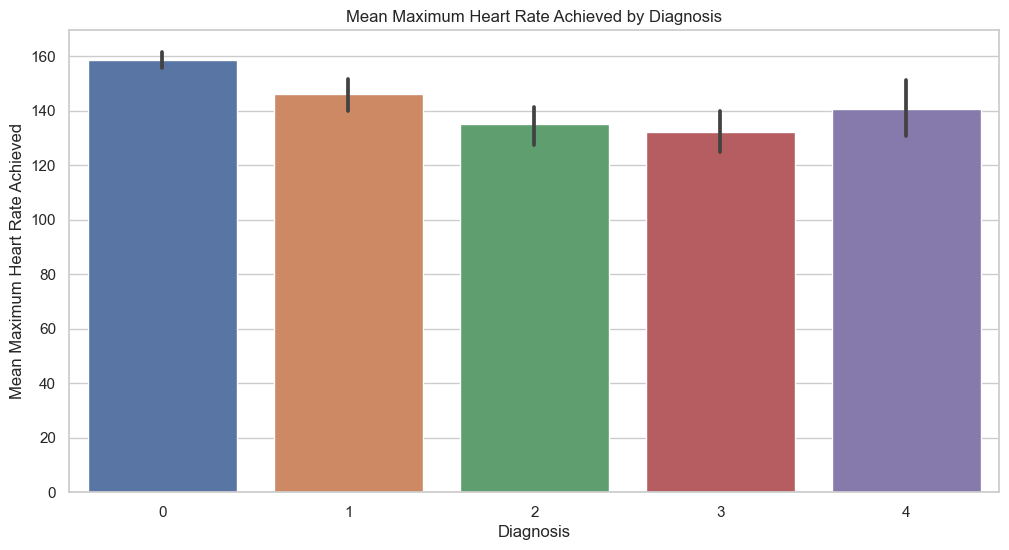

In [21]:
plt.figure(figsize=(12, 6))
sns.barplot(x='num', y='thalach', data=df, estimator=np.mean)
plt.title('Mean Maximum Heart Rate Achieved by Diagnosis')
plt.xlabel('Diagnosis')
plt.ylabel('Mean Maximum Heart Rate Achieved')
plt.show()

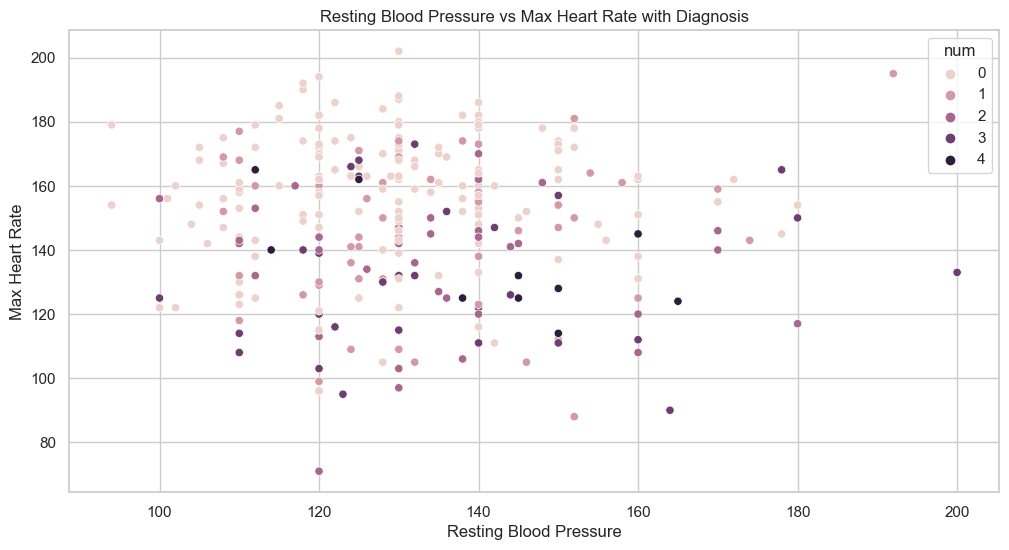

In [22]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='trestbps', y='thalach', hue='num', data=df)
plt.title('Resting Blood Pressure vs Max Heart Rate with Diagnosis')
plt.xlabel('Resting Blood Pressure')
plt.ylabel('Max Heart Rate')
plt.show()

Overall, these two variables do not seem to show anything that is very relevant to the diagnosis nor that they are related to each other, confirming the low correlation calculated earlier.

### Question 5

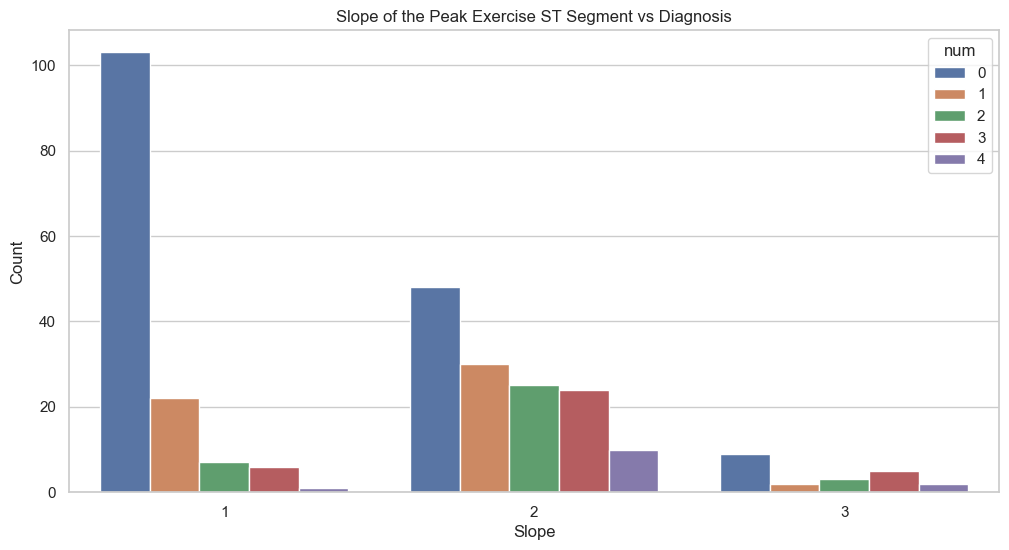

In [23]:
plt.figure(figsize=(12, 6))
sns.countplot(x='slope', data=df, hue='num')
plt.title('Slope of the Peak Exercise ST Segment vs Diagnosis')
plt.xlabel('Slope')
plt.ylabel('Count')
plt.show()

This confirms the point of the slope labels.  
- For slope = 1, the pattern is normal, not indicating a positive diagnosis;
- For slope = 2, however, although it is not yet a serious problem, it presents a higher rate of people with problems;
- For slope = 3, the situation is already serious, which is highlighted by the number of people in the advanced stage compared to the others.

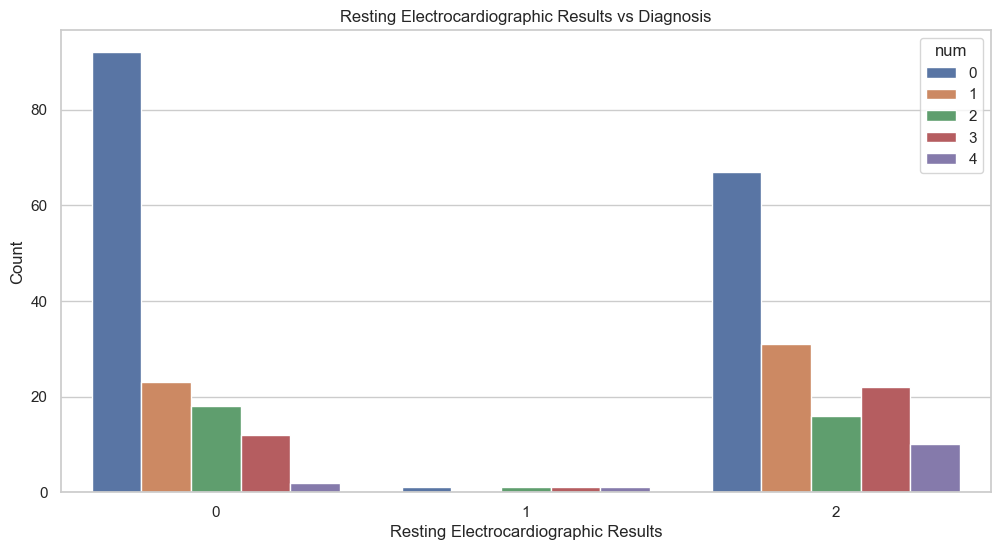

In [24]:
plt.figure(figsize=(12, 6))
sns.countplot(x='restecg', data=df, hue='num')
plt.title('Resting Electrocardiographic Results vs Diagnosis')
plt.xlabel('Resting Electrocardiographic Results')
plt.ylabel('Count')
plt.show()

In fact, restecg = 1 indicates an anomaly, as few patients had this result. The proportion of people with heart problems is higher for restecg = 2 than restecg = 0 as specified in the variable definition.

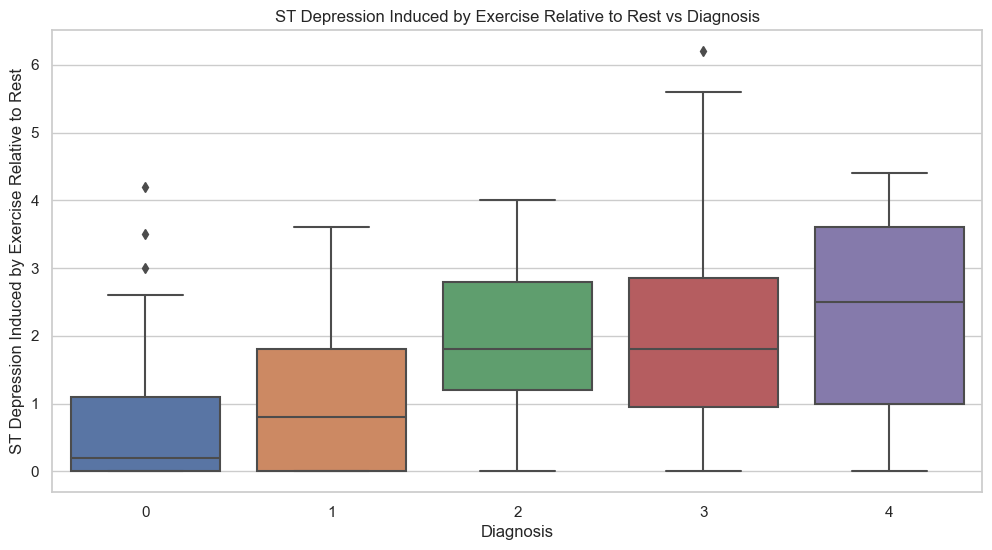

In [25]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='num', y='oldpeak', data=df)
plt.title('ST Depression Induced by Exercise Relative to Rest vs Diagnosis')
plt.xlabel('Diagnosis')
plt.ylabel('ST Depression Induced by Exercise Relative to Rest')
plt.show()

The higher the variable oldpeak, the greater the chances of having the disease.

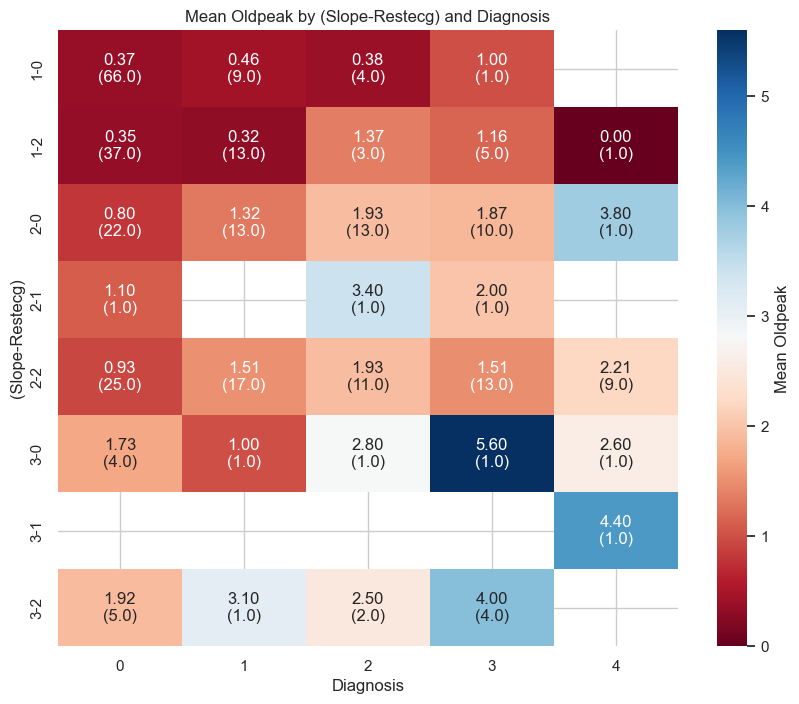

In [26]:
mean_values = df.groupby(['slope', 'restecg', 'num'])['oldpeak'].mean().unstack()
count_values = df.groupby(['slope', 'restecg', 'num'])['oldpeak'].size().unstack()

annot = mean_values.copy().astype(str)
for i in mean_values.index:
    for j in mean_values.columns:
        annot.at[i, j] = f'{mean_values.at[i, j]:.2f}\n({count_values.at[i, j]})'

plt.figure(figsize=(10, 8))
sns.heatmap(mean_values, annot=annot, cmap='RdBu', fmt='', cbar_kws={'label': 'Mean Oldpeak'})
plt.title('Mean Oldpeak by (Slope-Restecg) and Diagnosis')
plt.xlabel('Diagnosis')
plt.ylabel('(Slope-Restecg)')
plt.show()

Let the values in parentheses within the squares be the number of patients that make up the mean oldpeak for each (slope-restecg) pair and diagnosis.

Despite the small amount of data characterizing the lower right part of the heatmap, it is possible to say that electrocardiogram exams, when related to each other, generate an interesting profile for the diagnosis of advanced disease. Higher values for all of them seem to precisely indicate a worse heart problem.

# Final Considerations

Due to this exploratory analysis, I can affirm that I have gained familiarity with the data and the way to define a medical diagnosis, even if in the form of a layperson who knows a little more about it.